In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree, ensemble
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold
from collections import defaultdict
import pprint

In [2]:
# Assignment Constants
RANDOM_STATE = 10
FIGSIZE = (12,8)
#### Use the following line before plt.plot(....) to increase the plot size ####
# plt.figure(figsize=FIGSIZE)

## Question 1 
Use the breast cancer data set from Homework 0 to create a training set. Recall that the
label is 0 if the patient’s data indicates a malignant cancer and 1 otherwise. Compute the
base rate of malignant cancer occurrence over the entire data set. In other words, what would
be your best guess for the probability of malignant cancer of a single example using only the
labels in the training set? This question is very simple, so try not to overthink it.

In [4]:
cancer=load_breast_cancer()
X_cancer=cancer.data
y_cancer=cancer.target
#Malignant are zeros, 1 otherwise. We want the ratio of malignants. If we sum over all 
# the target cancer values we get the number of otherwise. So , we use the complement of such 
# probability
prob_cancer=1-sum(y_cancer)/len(y_cancer)

print(prob_cancer)


0.37258347978910367


## 2
The goal is to build a decision tree that, based on the other features in the set, predicts
whether or not a patient has malignant cancer. So this is a classification problem. Using
`tree.DecisionTreeClassifier` and other functions in the scikit-learn library, one can build
a decision tree and calculate both its training accuracy when fitted to the entire data set as
well as its accuracy using 10-fold cross validation (which gives a better idea of true accuracy).
In this question you will need to complete two sub-components:
### (a) 
(a) Make a plot visualizing the performance of a `tree.DecisionTreeClassifier` as you
search for an optimal `max_depth` parameter. Vary the depth of your decision tree using
max depth = 1,2,. . . ,10 and record the results from the following evaluation procedures
for each setting:
* The accuracy when training and testing on the full dataset.
* 10-fold cross-validated accuracy.

Plot the results of both evaluation procedures on the same plot with evaluation scores on
the y-axis and max depth values on the x-axis. Use 10 as your random seed/state for the
decision tree and the cross-validation. Use a legend to label both evaluation procedures.


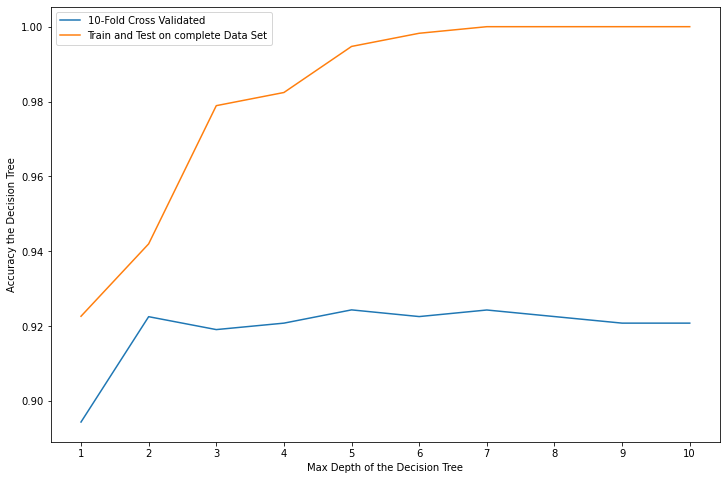

In [10]:
av_cv_scores=[]
depth=[]
accuracy_complete=[]
for i in range(1,11):
    depth.append(i)
    clf=tree.DecisionTreeClassifier(max_depth=i,random_state=RANDOM_STATE)
    
    kfold = KFold(n_splits = 10,random_state=RANDOM_STATE, shuffle=True) 
    #Calculating the average of the cross validation scores
    av_cv_scores.append( sum(cross_val_score(clf, X_cancer, y_cancer, cv=kfold))/10)
    
    clf_complete=tree.DecisionTreeClassifier(max_depth=i,random_state=RANDOM_STATE)
    clf_complete.fit(X_cancer,y_cancer)
    y_pred_complete=clf_complete.predict(X_cancer)
    
    #calculating accuracy for the complete trained in the data set
    num_correct_predictions = (y_pred_complete== y_cancer).sum()
    accuracy_complete.append(num_correct_predictions / y_cancer.shape[0])
    
   


    
plt.figure(figsize=FIGSIZE)

plt.xlabel("Max Depth of the Decision Tree")
plt.ylabel("Accuracy the Decision Tree")



plt.plot(depth,av_cv_scores,label="10-Fold Cross Validated")

plt.plot(depth,accuracy_complete,label="Train and Test on complete Data Set")
plt.xticks(depth)
plt.legend(loc='upper left')


    

### (b) 
Answer the questions below based on the results of 2a. Write your answers in the
corresponding field in the markdown cell that is present in the HW1 template notebook.

Do this by double clicking the markdown cell and writing your answer directly in the
cell. Pressing enter will re-render the markdown.

#### (i.)
What setting of `max_depth` gave the best accuracy w.r.t. the **full-dataset** accuracy?
If more than one setting equaled the best accuracy, list each of the best settings.

**Student answer here:** The best accuracy  w.r.t the full-dataset is with depth o 7,8,9 and 10 with accuracy of 1. 

#### (ii.)
What setting of `max_depth`  gave the best accuracy w.r.t. the **cross-
validated** accuracy? If more than one setting equaled the best accuracy, list each of the best settings.

**Student answer here:**  The best cross-validated accuracy is with depth of 5. The closest following value is 7, the difference in average cross validation accuracy is extremely small.




## 3\. 
This question explores random forest classifiers by using scikit-learn’s `ensemble.RandomForestClassifier`.
You will make two plots and answer questions about them.

### (a) 
For the first plot, use a `ensemble.RandomForestClassifier` and the best depth you
found 2(b)ii as `max_depth`. We will now find the optimal setting of a second parameter,
n estimators. Vary the number of trees in the forest via the parameter `n_estimators`
and plot its 10-fold cross-validated accuracy (use `n_estimators` = 1, 2, . . . , 20). Again,
use 10 as your random seed for your classifier and cross-validation.

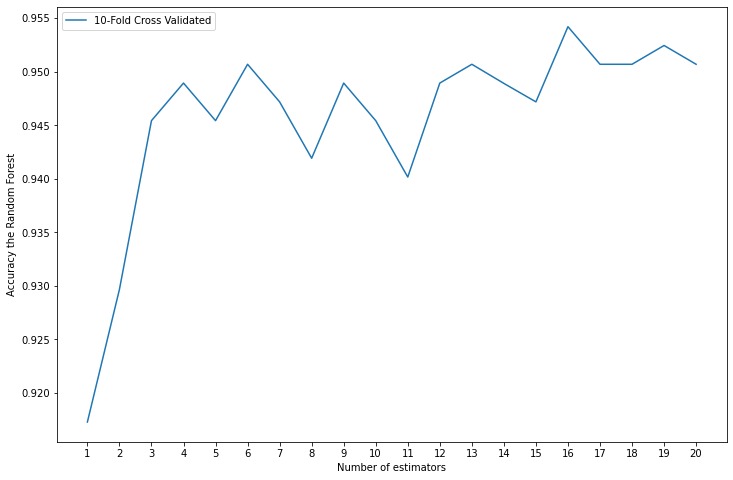

In [9]:
from sklearn.ensemble import RandomForestClassifier
av_cv_scores_RF=[]
depth=[]
for i in range(1,21):
    depth.append(i)
    clf = RandomForestClassifier(n_estimators=i,max_depth=5, random_state=10)
    kfold = KFold(n_splits = 10,random_state=RANDOM_STATE, shuffle=True)  
    av_cv_scores_RF.append( sum(cross_val_score(clf, X_cancer, y_cancer, cv=kfold))/10)

plt.figure(figsize=FIGSIZE)

plt.xlabel("Number of estimators")
plt.ylabel("Accuracy the Random Forest")
plt.xticks(depth)




plt.plot(depth,av_cv_scores_RF,label="10-Fold Cross Validated")

    
plt.legend(loc='upper left')



### (b) 
Do you see an improvement using random forests versus using a single tree? (Note: use
the `n_estimators`=1 result as the result for a single tree.)

**Student answer here:** Yes. There is an increment of the accuracy for any random forest with greater than 1 tree. The maximum difference is from  below accuracy of 0.92 with a single decision tree up to approximately 0.955 accuracy with 16 trees in the random forest.

### (c) 
What setting of `n_estimators` gave the best accuracy w.r.t. the cross-validated ac-
curacy?

**Student answer here:**  16 trees was the best number of estimators.

### (d) 
For the second plot, again use a `ensemble.RandomForestClassifier`, but this time
you will fix the `n_estimators` parameter and again attempt to find the optimal setting
of a `max_depth`. Use your answer to 3c as the setting for `n_estimators` and follow the
procedure from 2a to find the best setting for max depth. This time, only plot the results
from cross-validation and not the full set, but the plot should be the same structure
as in 2a otherwise (use `max_depth` = 1,2,. . . ,10). Again, use 10 as your random seed.

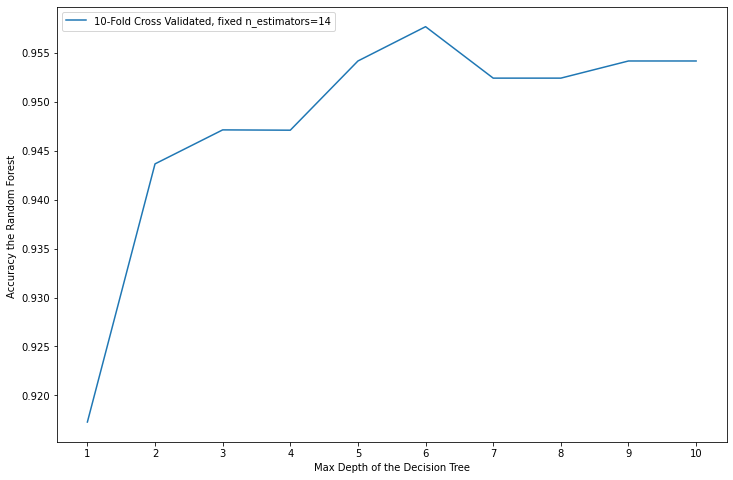

In [12]:
av_cv_scores=[]
depth=[]
for i in range(1,11):
    depth.append(i)
    clf = RandomForestClassifier(n_estimators=16,max_depth=i, random_state=RANDOM_STATE)
    kfold = KFold(n_splits = 10,random_state=RANDOM_STATE, shuffle=True)  
    av_cv_scores.append( sum(cross_val_score(clf, X_cancer, y_cancer, cv=kfold))/10)
    
    
plt.figure(figsize=FIGSIZE)

plt.xlabel("Max Depth of the Decision Tree")
plt.ylabel("Accuracy the Random Forest ")



plt.plot(depth,av_cv_scores,label="10-Fold Cross Validated, fixed n_estimators=14")

plt.xticks(depth)
plt.legend(loc='upper left')

### (e) 
In the plot in 3d, is the optimal setting of `max_depth` the same as in 2(b)ii? If not, what
is the new optimal setting of `max_depth`?

**Student answer here:**  It is not the same optimal setting. The new optimal is 6 as the maximum depth. In 2b) ii was 5 .

## 4\. 
For this last question, we will explore the dependability of our estimates. 
### (a) 
Make a plot using the following procedure:
#### i. 
Using random state values from 0, 1, · · · , 99 calculate the 10-fold cross-validation
accuracy of different `tree.DecisionTreeClassifiers` with max depth settings from
1, 2, · · · , 10.
As before, you should use the same random state value for your classifier and cross-validation.
#### ii. 
Then record the best max depth settings for each random state. Be sure to check whether multiple settings
achieve the best accuracy.


Plot the counts for the best max depth settings as a bar chart with the max depth settings on the x-axis and the 'best parameter counts' on the y-axis (number of times that parameter was selected as the best max depth setting).

*Note*: this calculation might take some time. For debugging, try a smaller range of
random states.

{6: 26, 10: 3, 8: 15, 9: 13, 7: 15, 4: 5, 5: 16}


<BarContainer object of 7 artists>

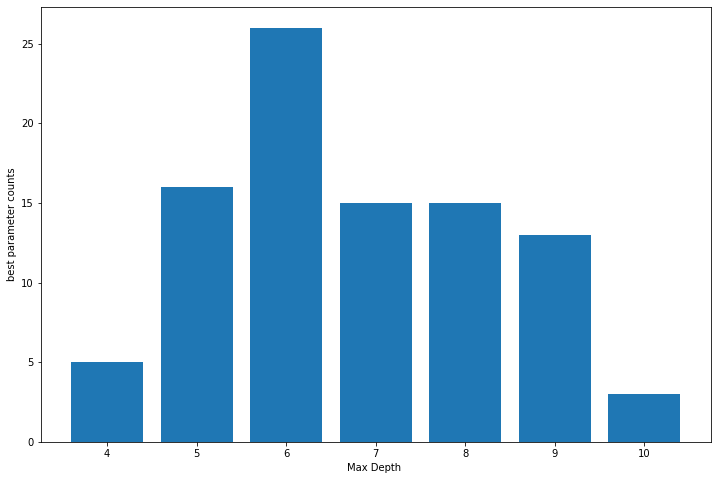

In [26]:
depth_max={}
for i in range(100):
    av_cv_scores_for_certain_random=[]
    for j in range(1,11):
        depth.append(j)
        clf = RandomForestClassifier(n_estimators=16,max_depth=j, random_state=i)
        kfold = KFold(n_splits = 10,random_state=i, shuffle=True)  
        av_cv_scores_for_certain_random.append( sum(cross_val_score(clf, X_cancer, y_cancer, cv=kfold))/10)
    maximum_acc=max(av_cv_scores_for_certain_random)
    depth_maximum_acc=av_cv_scores_for_certain_random.index(maximum_acc)+1
    
    if depth_maximum_acc in depth_max:
        depth_max[depth_maximum_acc]=depth_max[depth_maximum_acc]+1
    else:
        depth_max[depth_maximum_acc]=0


counts=[]
best_depths=[]
for elements in depth_max:
    best_depths.append(elements)
    counts.append(depth_max[elements])
    
    

print(depth_max)
    
plt.figure(figsize=FIGSIZE)

plt.xlabel("Max Depth ")
plt.ylabel("best parameter counts")



plt.bar(best_depths,counts)


### (b) 
What are the top two most frequent parameter settings?

**Student answer here:**  5 and 6  are the most frequent parameter settings.